# **FARS Project**

---

**The main goal of the FARS project is to delve into the extensive Fatality Analysis Reporting System (FARS) dataset, aiming to comprehensively analyze and gain insights into the various facets of traffic accidents in the United States. By examining a diverse array of factors encompassing crash classifications, road conditions, vehicle attributes, and environmental elements, the project seeks to uncover underlying causes and contributing variables behind road accidents. The ultimate purpose is to inform the development of enhanced road safety measures, targeted interventions, and impactful policies geared towards minimizing accidents and their tragic outcomes. This endeavor not only fosters safer roadways for all but also equips researchers, policymakers, and transportation authorities with invaluable insights to collaboratively advance a safer and more secure transportation realm.**


| Column      | Description                                                                                       |
|-------------|---------------------------------------------------------------------------------------------------|
| fatals      | Number of fatalities in the event                                                                |
| a_ct        | Type of crash: single, two-vehicle, more than 2 vehicle                                         |
| a_ped_f     | Whether pedestrian fatality involved in crash                                                   |
| a_pedal_f   | Whether pedalcyclist fatality involved in crash                                                 |
| a_roll      | Whether vehicle rollover involved in crash                                                      |
| a_hr        | Whether hit-and-run involved in crash                                                           |
| a_polpur    | Whether police pursuit involved in crash                                                        |
| month       | Month of year when crash occurred                                                               |
| day         | Day of month when crash occurred                                                                |
| day_week    | Day of the week when crash occurred                                                             |
| hour        | Hour of the day when crash occurred                                                             |
| minute      | Minute in the hour when crash occurred                                                          |
| a_dow_type  | Day of week type: weekday (M-F) or weekend (Sat-Sun)                                           |
| a_tod_type  | Time of day time: daytime (6 am to 6 pm), nighttime (6 pm to 6 am)                             |
| state       | State in which crash occurred                                                                   |
| a_region    | Region (made up of states) where crash occurred                                                 |
| a_ru        | Rural or urban                                                                                  |
| a_inter     | Whether crash occurred on Interstate highway                                                    |
| a_intsec    | Whether crash occurred at an intersection or not                                               |
| a_roadfc    | Type of road (interstate, local, etc.)                                                          |
| a_junc      | Identifies if crash occurred in or proximity to junction or interchange area of two or more roadways |
| a_relrd     | Identifies area of roadway where crash occurred (on, off, shoulder, median, etc.)                |
| age         | Age of driver                                                                                    |
| permvit     | Number of persons in motor vehicles in-transport                                               |
| pernotmvit  | Number of persons not in motor vehicles in-transport                                           |
| a_ped       | Whether crash involved a pedestrian                                                             |
| numoccs     | Number of motor vehicle occupants                                                                |
| Vehicle-related                   |                                                                                                   |
| ve_forms    | Number of vehicle forms submitted for mv in transport                                           |
| ve_total    | Number of vehicle forms submitted                                                               |
| mod_year    | Vehicle model year                                                                               |
| a_body      | Vehicle body type (automobile, light trucks, medium/high trucks, buses, etc.)                   |
| owner       | Type of registered owner of vehicle in crash                                                    |
| deaths      | Number of fatalities in vehicle                                                                  |
| impact1     | Areas of impact - initial contact point                                                         |
| deformed    | Extent of damage to vehicle                                                                      |
| weather     | Prevailing atmospheric conditions that existed at the time of the crash                         |
| lgt_cond    | Type/level of light that existed at the time of the crash                                       |

In [51]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [31]:
#Uploading the dataset
FARS = pd.read_csv("/content/drive/MyDrive/Hackathon/fars_train.csv")
FARS.head(4)

,u_id,fatals,a_ct,a_ped_f,a_pedal_f,a_roll,a_hr,a_polpur,month,day,...,owner,deaths,numoccs,impact1,deformed,ve_forms,ve_total,weather,lgt_cond,driver_factor
0,32083,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,10,2,...,Driver (in this crash) Was Registered Owner,1,1.0,Clockpoint 12,Disabling damage,1,1,Clear,Dark - not lighted,other
1,55073,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,6,21,...,Driver (in this crash) Not Registered Owner (o...,1,1.0,Clockpoint 1,Disabling damage,1,1,Clear,Daylight,speeding_driver_involved
2,7458,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,7,14,...,Driver (in this crash) Was Registered Owner,0,1.0,Clockpoint 12,NaN,1,1,Clear,Daylight,other
3,5685,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,9,15,...,Driver (in this crash) Not Registered Owner (o...,0,1.0,Clockpoint 12,Functional damage,1,1,Clear,Dark - not lighted,other


# **Pre-Processing**


## **Understanding the FARS dataset**

In [20]:
#Dimensions of the dataset
print("The dimensions of the FARS dataset are", FARS.shape,
      "meaning we have", FARS.shape[0], "rows and",
      FARS.shape[1], "columns in the FARS Dataset")

The dimensions of the FARS dataset are (45286, 39) meaning we have 45286 rows and 39 columns in the FARS Dataset


In [21]:
#Data types of columns in the dataset
FARS.dtypes

u_id               int64
fatals             int64
a_ct              object
a_ped_f           object
a_pedal_f         object
a_roll            object
a_hr              object
a_polpur          object
month              int64
day                int64
day_week          object
hour             float64
minute           float64
a_dow_type        object
a_tod_type        object
state             object
a_region          object
a_ru              object
a_inter           object
a_intsec          object
a_roadfc          object
a_junc            object
a_relrd           object
age                int64
permvit            int64
pernotmvit         int64
a_ped             object
mod_year         float64
a_body            object
owner             object
deaths             int64
numoccs          float64
impact1           object
deformed          object
ve_forms           int64
ve_total           int64
weather           object
lgt_cond          object
driver_factor     object
dtype: object

**The data type displays a dataset with several columns containing information related to vehicular accidents. These columns encompass diverse details such as unique identifiers, fatality counts, vehicle attributes, accident timing, location specifics, age, and other relevant factors. The dataset captures crucial aspects such as accident severity, vehicle types, weather conditions, and lighting, thereby offering a comprehensive overview of the contributing elements in accidents.**

In [22]:
#Getting more information about FARS dataset
#FARS.info() provides a summary of the dataset's suck as the rangeIndex, data columns, Dtype, and the count of non-null
FARS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45286 entries, 0 to 45285
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   u_id           45286 non-null  int64  
 1   fatals         45286 non-null  int64  
 2   a_ct           45286 non-null  object 
 3   a_ped_f        45286 non-null  object 
 4   a_pedal_f      45286 non-null  object 
 5   a_roll         45286 non-null  object 
 6   a_hr           45286 non-null  object 
 7   a_polpur       45286 non-null  object 
 8   month          45286 non-null  int64  
 9   day            45286 non-null  int64  
 10  day_week       45286 non-null  object 
 11  hour           45286 non-null  float64
 12  minute         45286 non-null  float64
 13  a_dow_type     45286 non-null  object 
 14  a_tod_type     45286 non-null  object 
 15  state          45286 non-null  object 
 16  a_region       45286 non-null  object 
 17  a_ru           45286 non-null  object 
 18  a_inte

**The FARS dataset consists of 4 float64, 10 int64, and 25 object columns. This variety of data types reflects the dataset's comprehensive nature, covering both numerical and categorical information. With 45286 entries and 39 columns, it provides rich insights into various aspects of vehicular accidents, encompassing fatality details, timing, location, and vehicle characteristics. Missing values in certain columns suggest areas for data preprocessing.**

In [23]:
#FARS.describe() provides statistics such as the mean, minimum, standard deviation, and more.
FARS.describe()

,u_id,fatals,month,day,hour,minute,age,permvit,pernotmvit,mod_year,deaths,numoccs,ve_forms,ve_total
count,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.0,45286.000000
mean,28338.636863,1.048161,6.708939,15.683125,12.603045,28.335104,41.507265,1.469063,0.338537,2005.714869,0.740913,1.435081,1.0,1.050987
std,16370.250933,0.268141,3.379152,8.845668,7.338747,17.403514,18.031039,1.112965,0.567394,6.605942,0.549848,0.847850,0.0,0.338383
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,1.000000,0.000000,1984.000000,0.000000,1.000000,1.0,1.000000
25%,14148.500000,1.000000,4.000000,8.000000,6.000000,14.000000,26.000000,1.000000,0.000000,2001.000000,0.000000,1.000000,1.0,1.000000
50%,28380.500000,1.000000,7.000000,16.000000,14.000000,29.000000,38.000000,1.000000,0.000000,2005.000000,1.000000,1.000000,1.0,1.000000
75%,42532.500000,1.000000,10.000000,23.000000,19.000000,44.000000,55.000000,2.000000,1.000000,2011.000000,1.000000,2.000000,1.0,1.000000
max,56607.000000,20.000000,12.000000,31.000000,23.000000,59.000000,97.000000,52.000000,23.000000,2019.000000,18.000000,6.000000,1.0,21.000000


In [24]:
#Checking for missing data in the FARS dataset
FARS.isnull().sum()

u_id             0
fatals           0
a_ct             0
a_ped_f          0
a_pedal_f        0
a_roll           0
a_hr             0
a_polpur         0
month            0
day              0
day_week         0
hour             0
minute           0
a_dow_type       0
a_tod_type       0
state            0
a_region         0
a_ru             0
a_inter          0
a_intsec         0
a_roadfc         0
a_junc           0
a_relrd          0
age              0
permvit          0
pernotmvit       0
a_ped            0
mod_year         0
a_body           0
owner            0
deaths           0
numoccs          0
impact1          0
deformed         0
ve_forms         0
ve_total         0
weather          0
lgt_cond         0
driver_factor    0
dtype: int64

## **Cleaning FARS dataset**


### **Handling Missing Values**

In [25]:
#Fill missing values in numerical columns with mean
#hour, minute, mod_year, and numoccs
numericalColumns = ['hour', 'minute', 'mod_year', 'numoccs']

for col in numericalColumns:
    if FARS[col].dtype == np.float64 or FARS[col].dtype == np.int64:
        FARS[col].fillna(FARS[col].mean(), inplace=True)


#Fill missing values in numerical columns with mode
#a_tod_type,a_ru, a_inter, a_intsec, owner, impact1, deformed, weather, and lgt_cond
categoricalColumns = ['a_tod_type', 'a_ru', 'a_inter', 'a_intsec', 'owner', 'impact1', 'deformed', 'weather', 'lgt_cond','a_junc']

for col in categoricalColumns:
    if FARS[col].dtype == 'object':
        FARS[col].fillna(FARS[col].mode()[0], inplace=True)


### **Dealing with Duplicates**

In [26]:
#Reviewing duplicated_rows in the FARS dataset
duplicated_rows = FARS[FARS.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [u_id, fatals, a_ct, a_ped_f, a_pedal_f, a_roll, a_hr, a_polpur, month, day, day_week, hour, minute, a_dow_type, a_tod_type, state, a_region, a_ru, a_inter, a_intsec, a_roadfc, a_junc, a_relrd, age, permvit, pernotmvit, a_ped, mod_year, a_body, owner, deaths, numoccs, impact1, deformed, ve_forms, ve_total, weather, lgt_cond, driver_factor]
Index: []

[0 rows x 39 columns]


In [27]:
#The sum count of the duplicated values
FARS.duplicated().sum()

0

**The FARS dataset does not have any duplicate values.**




### **Handling Outliers**

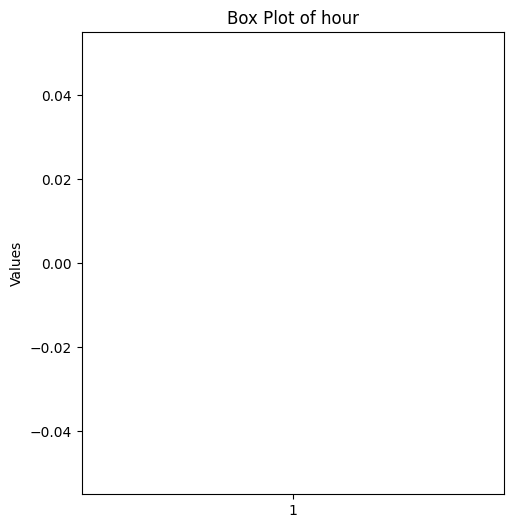

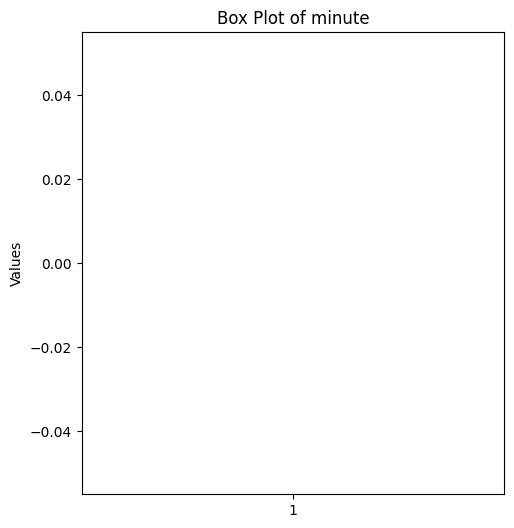

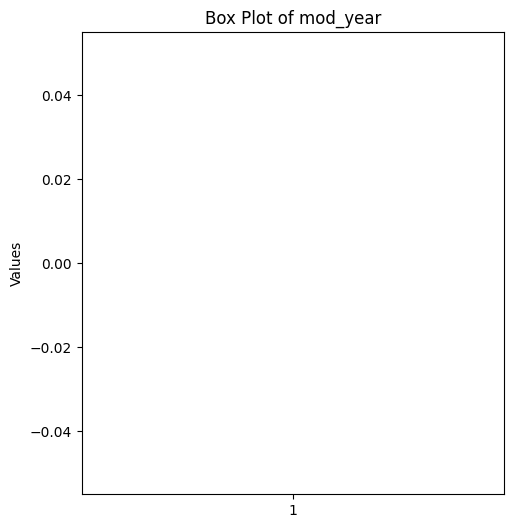

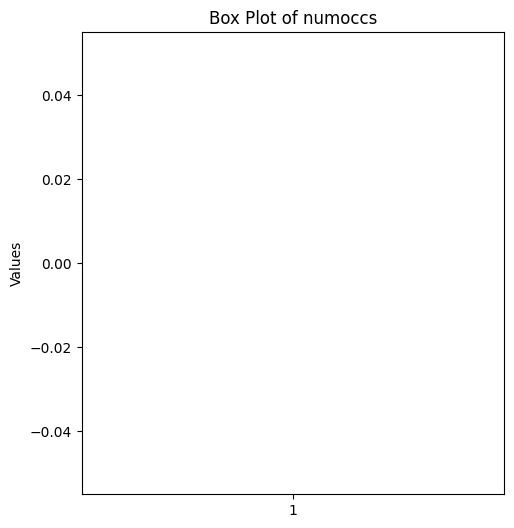

In [32]:

numericalColumns = ['hour', 'minute', 'mod_year', 'numoccs']
categoricalColumns = ['a_tod_type', 'a_ru', 'a_inter', 'a_intsec', 'owner', 'impact1', 'deformed', 'weather', 'lgt_cond','a_junc']
# Create box plots and histograms for numerical columns
for col in numericalColumns:
    plt.figure(figsize=(12, 6))

    # Box plot
    plt.subplot(1,2,1)
    plt.boxplot(FARS[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Values')
    plt.show()


year and numoccs

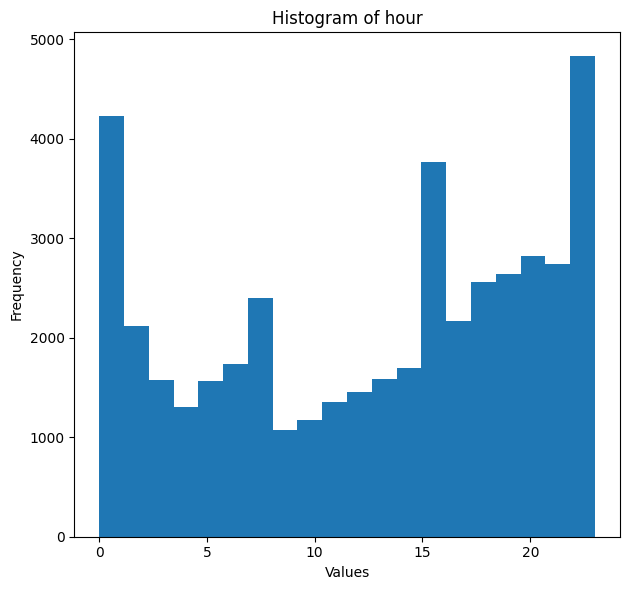

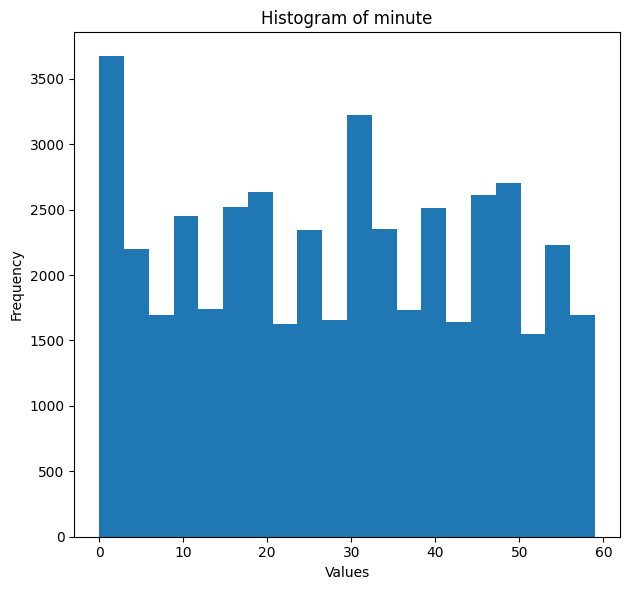

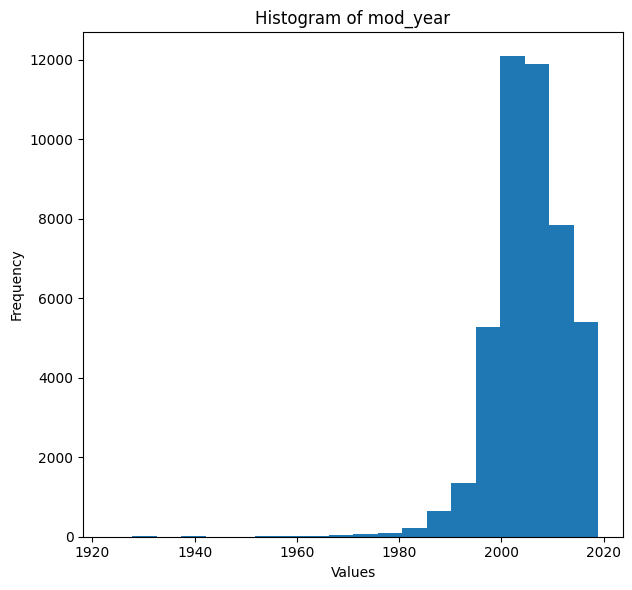

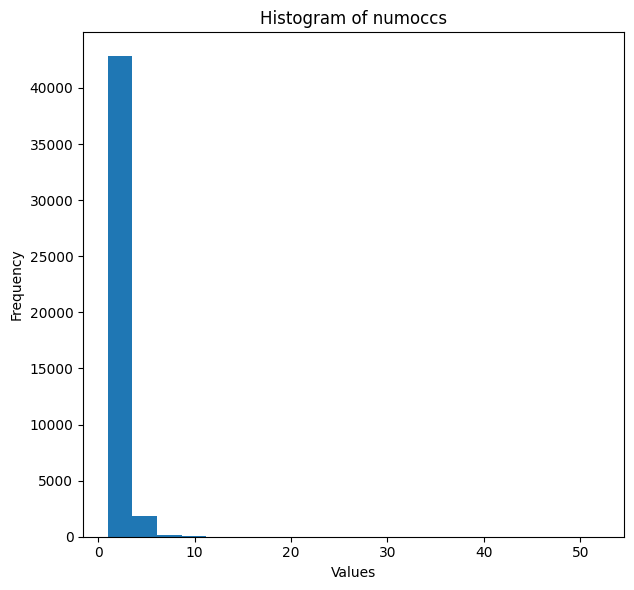

In [33]:
for col in numericalColumns:
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(FARS[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

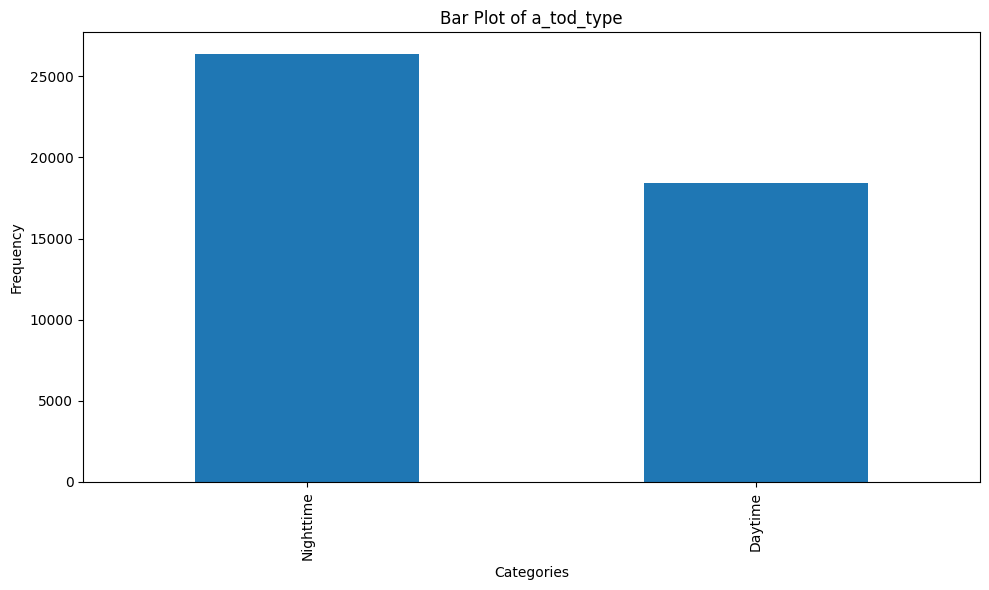

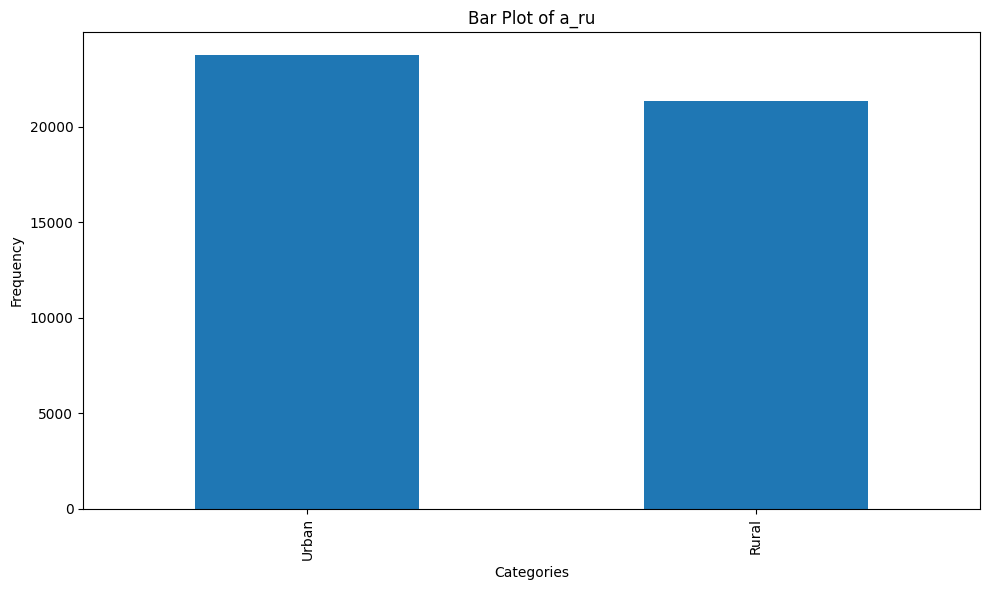

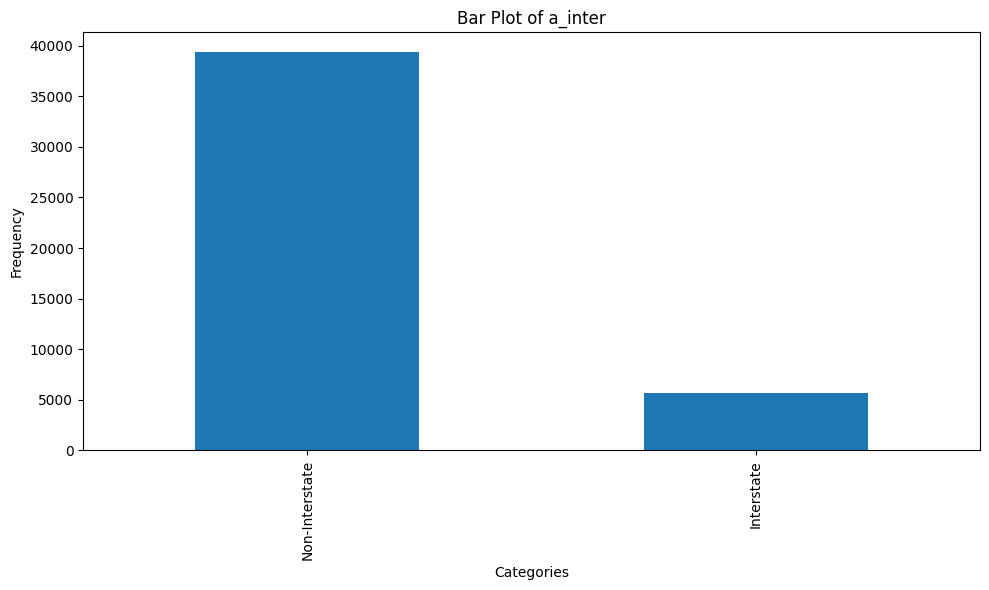

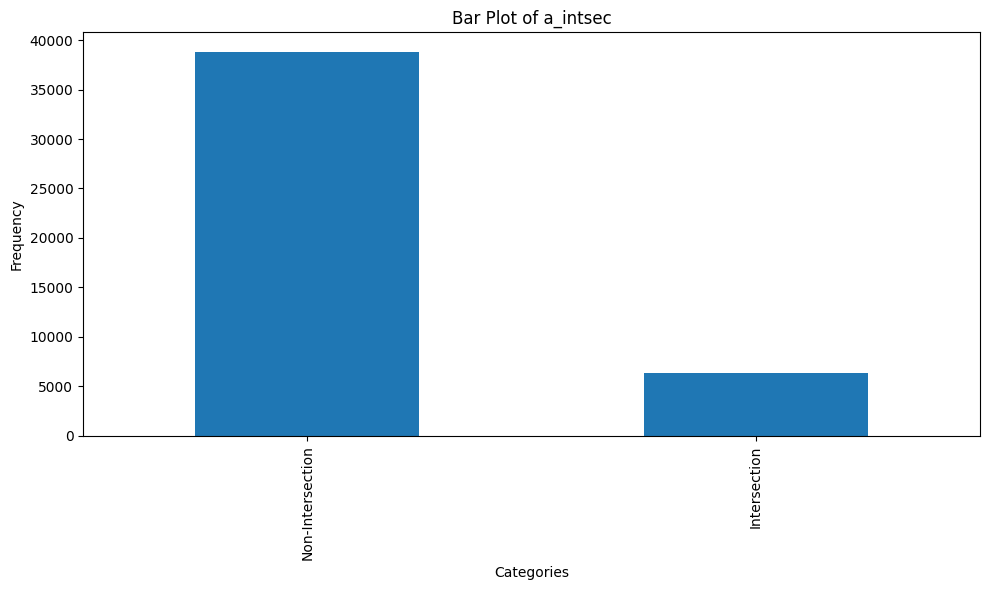

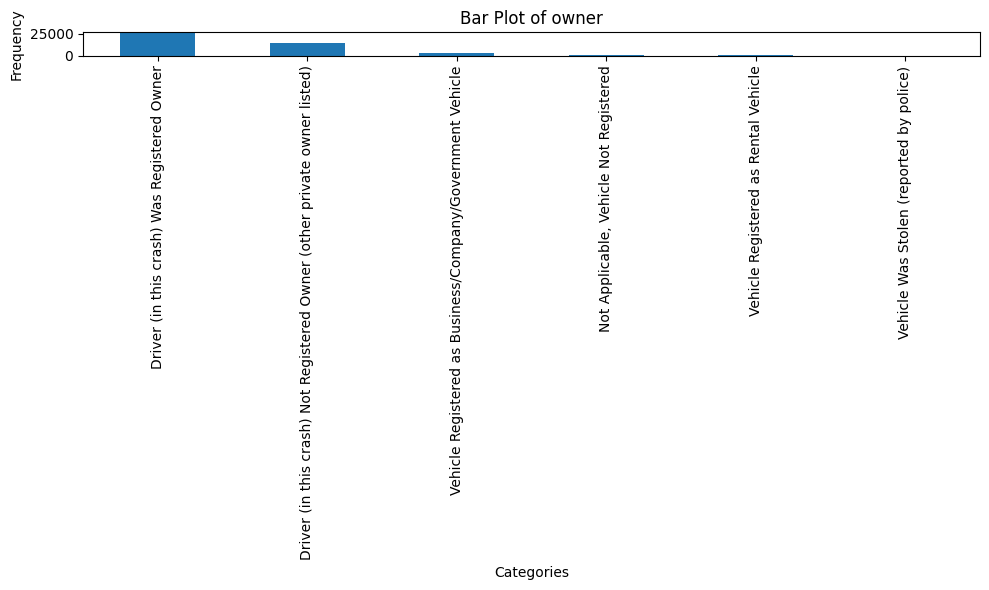

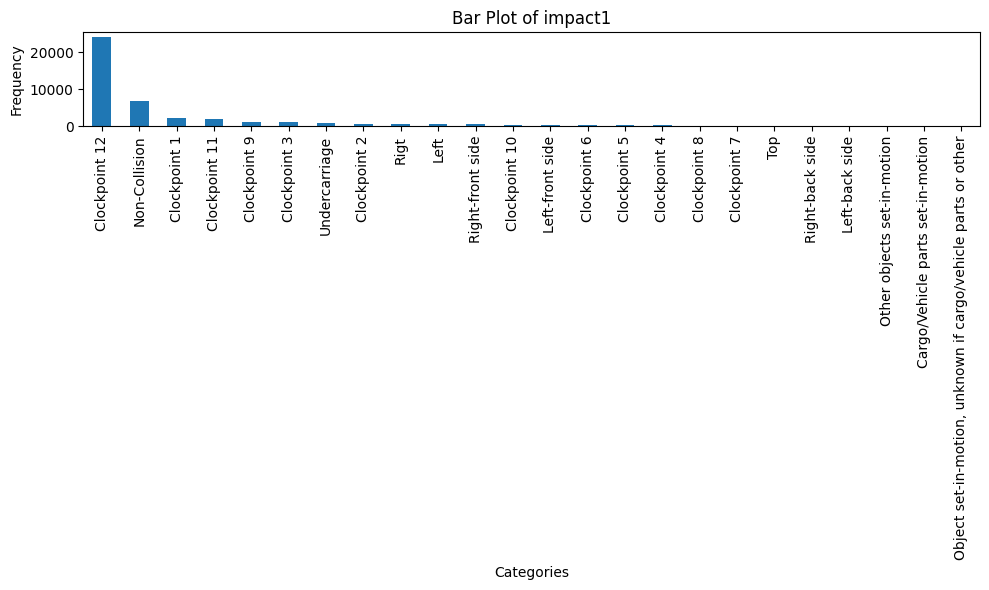

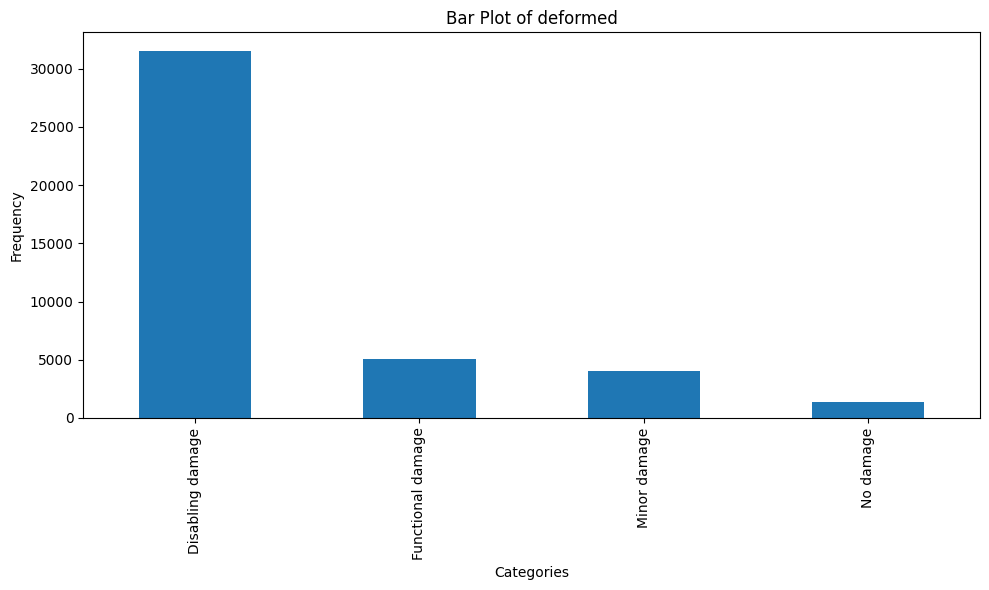

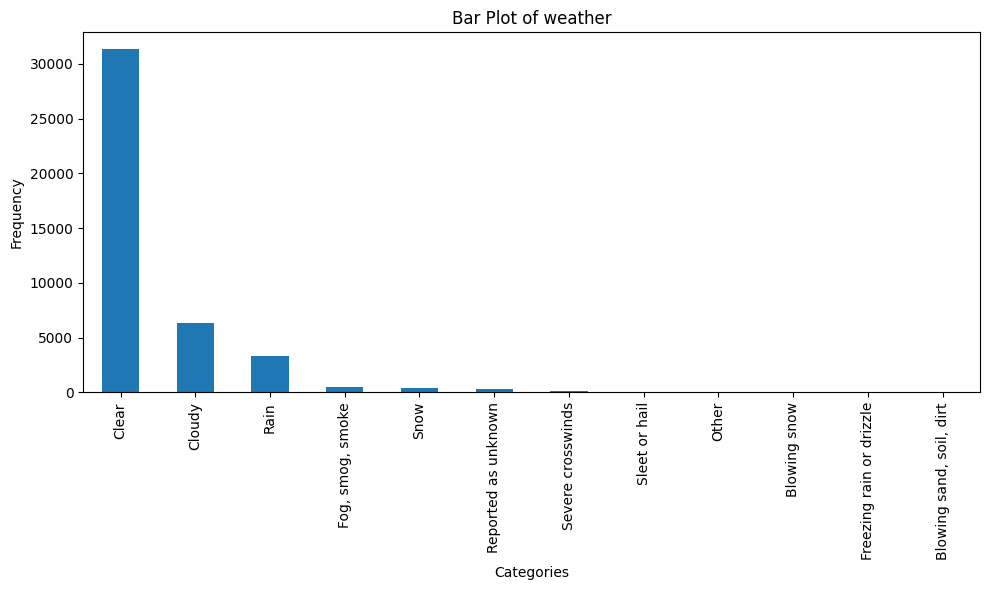

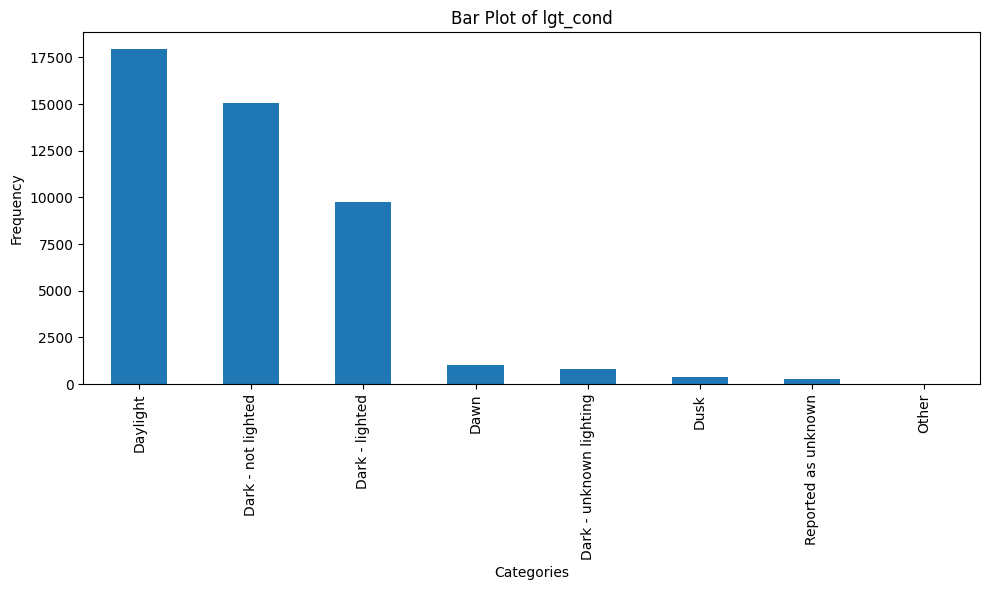

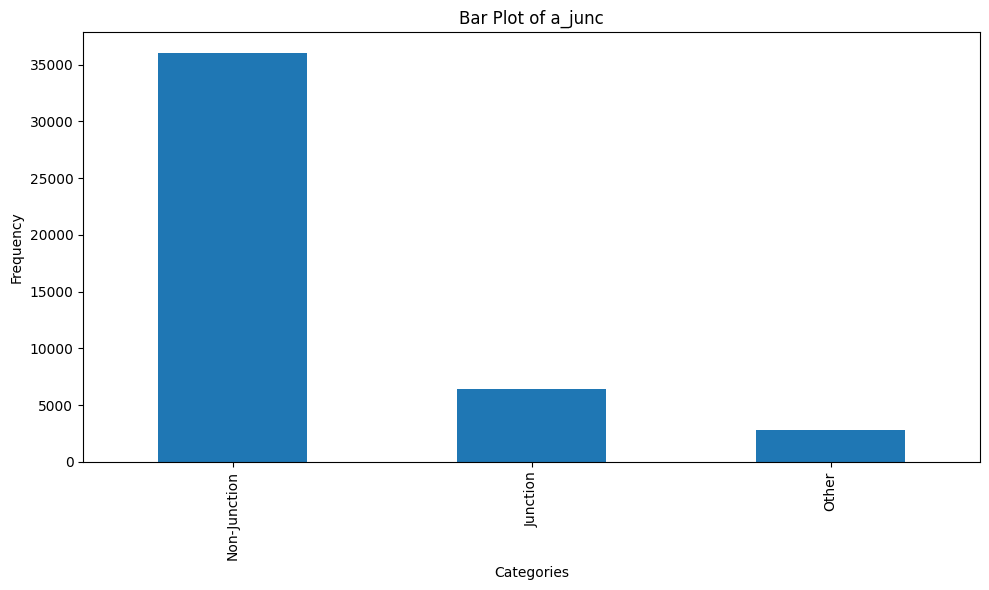

In [34]:
#Create bar plots for categorical columns
for col in categoricalColumns:
    plt.figure(figsize=(10, 6))

    # Bar plot
    value_counts = FARS[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


**After reviewing the outliers, my group and I have decided to keep these outliers, as they contain valuable information.**

## **Exploratory Data Analysis (EDA)**

In [35]:
FARS.head(3)

,u_id,fatals,a_ct,a_ped_f,a_pedal_f,a_roll,a_hr,a_polpur,month,day,...,owner,deaths,numoccs,impact1,deformed,ve_forms,ve_total,weather,lgt_cond,driver_factor
0,32083,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,10,2,...,Driver (in this crash) Was Registered Owner,1,1.0,Clockpoint 12,Disabling damage,1,1,Clear,Dark - not lighted,other
1,55073,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,6,21,...,Driver (in this crash) Not Registered Owner (o...,1,1.0,Clockpoint 1,Disabling damage,1,1,Clear,Daylight,speeding_driver_involved
2,7458,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,7,14,...,Driver (in this crash) Was Registered Owner,0,1.0,Clockpoint 12,NaN,1,1,Clear,Daylight,other


#### **Number of Accidents by Month Plot**

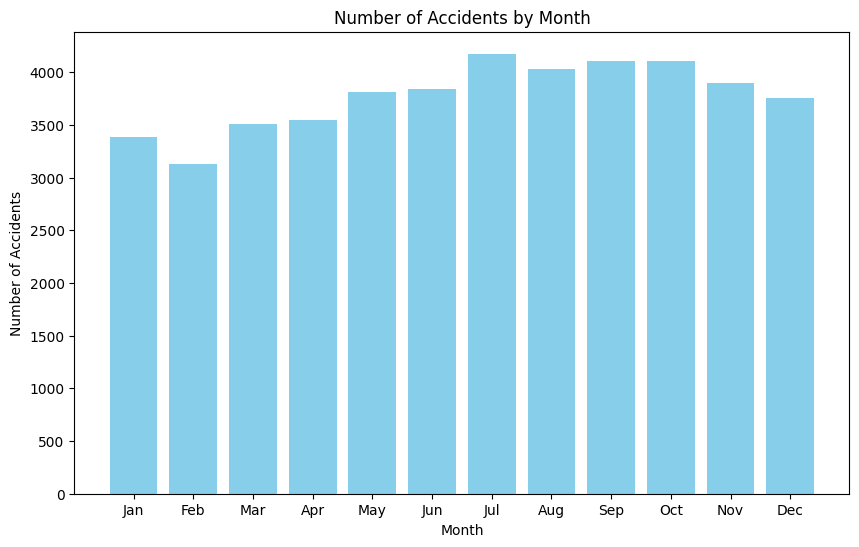

   Month  Number of Accidents
7    Jul                 4175
10   Oct                 4110
9    Sep                 4104
8    Aug                 4029
11   Nov                 3893
6    Jun                 3838
5    May                 3811
12   Dec                 3756
4    Apr                 3545
3    Mar                 3508
1    Jan                 3388
2    Feb                 3129


In [41]:
#Grouping the data by month and count the occurrences
month_counts = FARS['month'].value_counts().sort_index()
#Defining months as labels for the x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, month_counts, color ='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.show()
#DataFrame from the month_counts and months
monthsDF = pd.DataFrame({'Month': months, 'Number of Accidents': month_counts})
# Display the table
print(monthsDF.sort_values(by='Number of Accidents', ascending=False))

**Based on the data, the top three months with the highest number of accidents are July, October, and September. On the other hand, the top three months with the lowest number of accidents are February, January, and March.**

#### **Number of Accidents by Day Type**

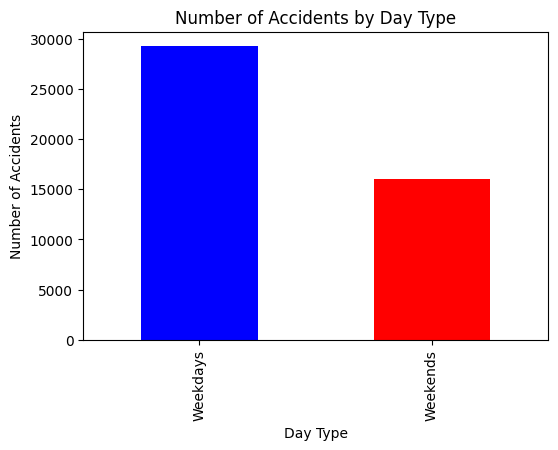

         Number of Accidents
Weekday                29242
Weekend                16044


In [46]:
#The count the occurrences of weekdays and weekends
dow_type_counts = FARS['a_dow_type'].value_counts()
DayType=['Weekday','Weekend']
#Bar plot
plt.figure(figsize=(6, 4))
dow_type_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Day Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day Type')
plt.xticks([0, 1], ['Weekdays', 'Weekends'])
plt.show()
#DataFrame from the dow_type_counts
monthsDF = pd.DataFrame({'Number of Accidents': dow_type_counts})
# Display the table
print(monthsDF.sort_values(by='Number of Accidents', ascending=False))

**The data indicates that there were 29,242 accidents on weekdays and 16,044 accidents on weekends.**

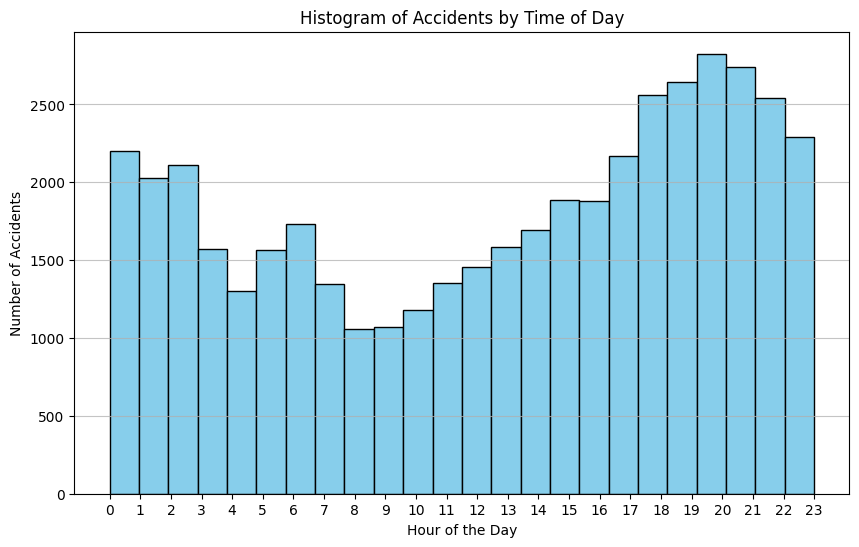

In [47]:
#Histogram
plt.figure(figsize=(10, 6))
plt.hist(FARS['hour'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Histogram of Accidents by Time of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.show()

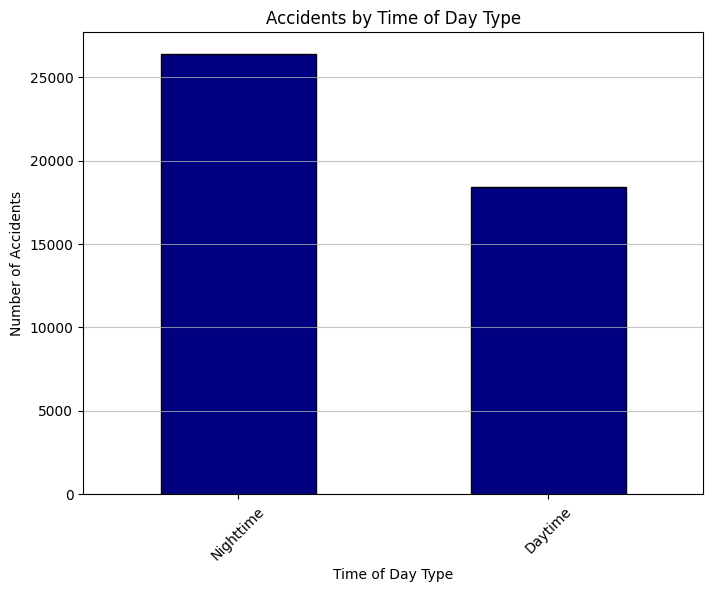

In [75]:
# the count of the Time of day
a_tod_type_count = FARS['a_tod_type'].value_counts()

#bar plot
plt.figure(figsize=(8, 6))
a_tod_type_count.plot(kind='bar', color='navy', edgecolor='black')
plt.xlabel('Time of Day Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Time of Day Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


**From the box plot, we can observe that the majority of accidents occur during nighttime.**

#### **Correlation Matrix**

In [61]:
# Calculate the correlation matrix
correlation_matrix = FARS.corr()
# Remove NaN values from the correlation matrix
correlation_matrix = correlation_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')
correlation_matrix

<ipython-input-61-3af85a1f1330>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = FARS.corr()


,u_id,fatals,month,day,hour,minute,age,permvit,pernotmvit,mod_year,deaths,numoccs,ve_total
u_id,1.000000,-0.007175,-0.004248,-0.000976,0.005310,-0.003568,-0.000310,-0.001304,-0.005915,-0.001840,0.000615,-0.000045,-0.008967
fatals,-0.007175,1.000000,-0.006268,-0.002019,-0.028389,-0.005326,-0.058642,0.329793,-0.004405,-0.006240,0.516885,0.312570,0.047165
month,-0.004248,-0.006268,1.000000,0.010194,0.008384,-0.001460,0.002191,-0.006296,0.019640,0.027024,-0.022712,-0.007171,-0.002876
day,-0.000976,-0.002019,0.010194,1.000000,0.003328,-0.002943,-0.002653,-0.001886,-0.000110,0.007505,0.002252,-0.002953,-0.008051
hour,0.005310,-0.028389,0.008384,0.003328,1.000000,0.020087,0.093685,0.006136,0.114219,-0.018048,-0.131289,0.004910,-0.024827
minute,-0.003568,-0.005326,-0.001460,-0.002943,0.020087,1.000000,0.002468,-0.004260,0.010729,-0.002468,-0.014118,-0.005180,0.005999
age,-0.000310,-0.058642,0.002191,-0.002653,0.093685,0.002468,1.000000,-0.143962,0.017013,-0.001638,-0.044879,-0.132537,-0.002491
permvit,-0.001304,0.329793,-0.006296,-0.001886,0.006136,-0.004260,-0.143962,1.000000,-0.070154,-0.007587,0.228470,0.949749,-0.004753
pernotmvit,-0.005915,-0.004405,0.019640,-0.000110,0.114219,0.010729,0.017013,-0.070154,1.000000,0.139582,-0.757497,-0.058112,0.125057
mod_year,-0.001840,-0.006240,0.027024,0.007505,-0.018048,-0.002468,-0.001638,-0.007587,0.139582,1.000000,-0.134988,-0.002904,0.022337


<ipython-input-62-6cd4d3ac800f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = FARS.corr()


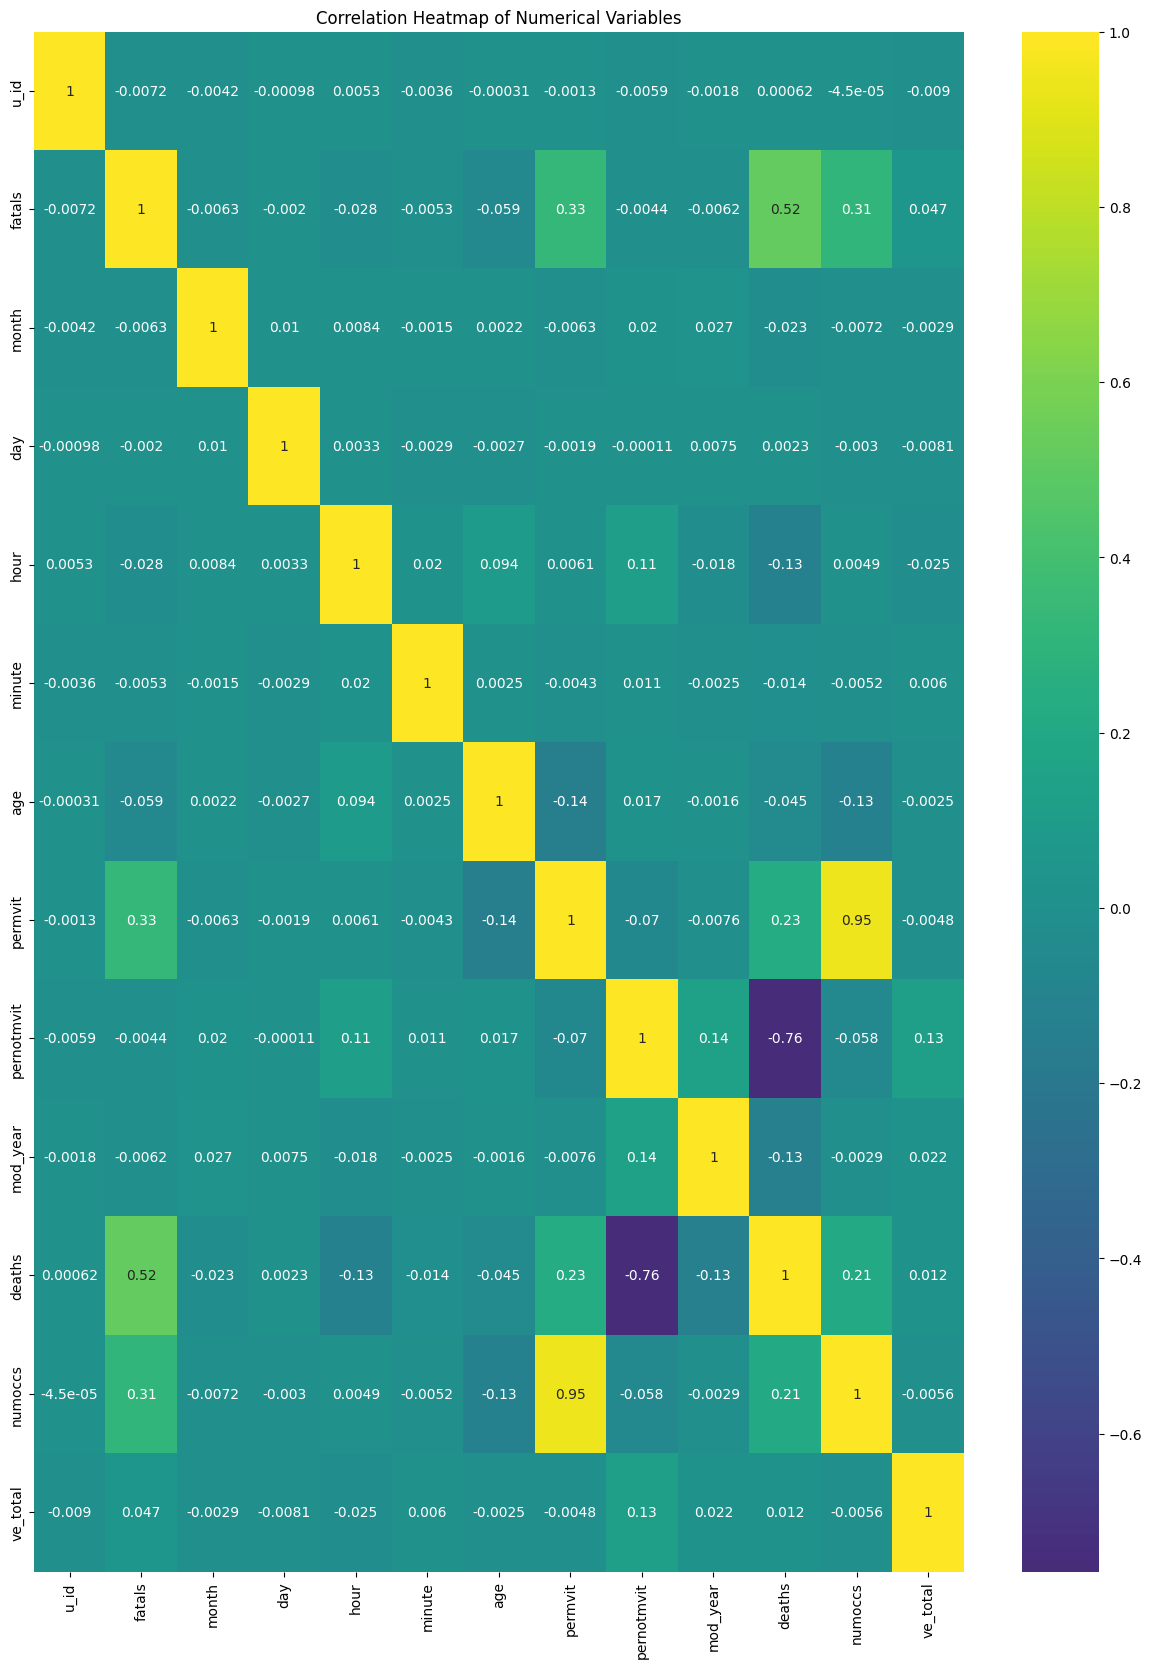

In [62]:
# Create a heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**Based on the matrix:**

* The variables "fatals" and "deaths" exhibit a strong positive correlation of approximately 0.52, suggesting a higher number of fatalities in the event corresponds to a higher number of deaths.
* The variables "permvit" and "numoccs" also show a strong positive correlation of about 0.95, implying that a higher number of persons in motor vehicles in-transport corresponds to a higher number of motor vehicle occupants.